In [4]:
# taken from internet: Python code for 2D random walk.
import numpy
import pylab
import random
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.offline as offline
from plotly.graph_objs import Scatter, Layout
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
offline.init_notebook_mode(connected=True)
from discreteMarkovChain import markovChain

In [74]:
c = "coordinates.csv"#"YorkeysKnobFiltered/YK_Coordinates.csv"
probs = "nPartiteAdjMatrix.csv"#"YorkeysKnobFiltered/YN_Probs.csv"
numClusters = 3
field_names = ['X', 'Y', "w"]
coords = pd.read_csv(c, header=None, names=field_names)
coords = coords.loc[:,["X","Y"]]
#change indexing of coords to match with transitions (0-19 instead of 1-20)
coords.index = np.arange(0, 20)
transitions = pd.read_csv(probs, header=None)
# Create a trace for building points
trace = go.Scatter(
    x = coords['X'].as_matrix(),
    y = coords['Y'].as_matrix(),
    name = 'Site',
    mode = 'markers',
    marker = dict(
        size = 6,
        color = 'rgba(42, 147, 227, .50)',
    )
)
agg = AgglomerativeClustering(n_clusters = numClusters).fit(coords.as_matrix())
aggPoints = []

for x in range(0, numClusters):
    aggPoints.append([])

for x in range(0, len(coords)):
    aggPoints[agg.labels_[x]].append(coords.as_matrix()[x])

centersX = []
centersY = []

clusterLabels = agg.labels_
citiesInCluster = [0] * len(clusterLabels)
for x in range(0, len(clusterLabels)):
    citiesInCluster[clusterLabels[x]] += 1

for x in range(0, numClusters):
    sumX = 0
    sumY = 0
    for y in range(0, len(aggPoints[x])):
        sumX += aggPoints[x][y][0]
        sumY += aggPoints[x][y][1]
    centersX.append(sumX / len(aggPoints[x]))
    centersY.append(sumY / len(aggPoints[x]))

aggCentersTrace = go.Scatter(
    x = centersX,
    y = centersY,
    name = 'Agg Clusters',
    mode = 'markers',
    marker = dict(
        size = 12,
        color = 'rgba(255, 0, 0, 0.75)'
    )
)

# #Plot result
# points = [trace]
# points.append(aggCentersTrace)
# #Gets name of city from the name of the csv file
# cityName = "Testing"#$c.split("/")[1].split("_")[0]
# #Plot
# iplot({
#         "data": points,
#         'layout': {'title': cityName + ' Landscape Cluster Coordinates with ' + str(numClusters) + ' Clusters'}
#         },
#         )

d = {"clusters":clusterLabels, "site":np.arange(0, len(clusterLabels), 1)}
sites_w_clusters = pd.DataFrame(data=d).sort_values("clusters")
cluster0 = sites_w_clusters.loc[sites_w_clusters['clusters'] == 0]
cluster1 = sites_w_clusters.loc[sites_w_clusters['clusters'] == 1]
cluster2 = sites_w_clusters.loc[sites_w_clusters['clusters'] == 2]

In [79]:
comm_coords = coords.iloc[list(cluster1["site"]), ]
to_transitions = transitions.loc[val, ]
coords

,X,Y
0,-92.139643,21.834372
1,-48.952209,54.007385
2,5.825684,6.108534
3,-93.633263,-67.154291
4,-100.545271,-35.103662
5,-84.895536,-79.665527
6,-80.223427,16.514316
7,-29.475139,-76.009895
8,14.337320,-162.413287
9,81.022546,-204.097188


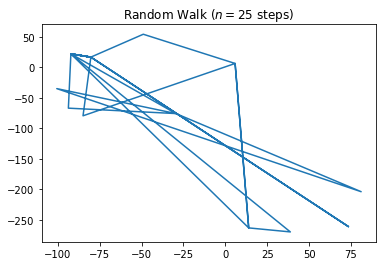

In [90]:
# defining the number of steps
n = 25
 
#creating two array for containing x and y coordinate
#of size equals to the number of size and filled up with 0's
x = numpy.zeros(n)
y = numpy.zeros(n)
 
# filling the coordinates with random variables
#randomly pick starting node and coordinate from transitions
#set that as current in x and y
#get list of nodes that you can jump to with transition probs
#randomly select one based on those transition probs
#add to x and y and set as new current
#repeat above

#randomly pick starting node and coordinate from transitions
val = random.randint(0, 20)
#set that as current in x and y
#coords lables starting from 1, transitions starting from 0
#I'm picking val based on the transitions labelling
x[0] = coords.loc[val, ][0]
y[0] = coords.loc[val, ][1]
for i in range(1, n):
    #get list of transitions that you can jump to with transition probs
    to_transitions = transitions.loc[val, ]
    to_nodes = np.array(to_transitions.index)
    new_val = np.random.choice(to_nodes, p=list(to_transitions))
    x[i] = coords.loc[new_val, ][0]
    y[i] = coords.loc[new_val, ][1]
    val = new_val

pylab.title("Random Walk ($n = " + str(n) + "$ steps)")
pylab.plot(x, y)
#pylab.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=600)
pylab.show()